In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# pandas basics

## numpy to data frame

In [2]:
n_data = np.array([[1,2],[3,4],[5,6],[7,8]])
n_data

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [3]:
df_data1 = pd.DataFrame(n_data)
df_data2 = pd.DataFrame(n_data, columns=["First", "Second"], index=["a", "b", "c", "d"])

In [4]:
df_data1

,0,1
0,1,2
1,3,4
2,5,6
3,7,8


In [5]:
df_data2

,First,Second
a,1,2
b,3,4
c,5,6
d,7,8


## data frame to numpy

In [6]:
df_data1.to_numpy()

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [7]:
df_data2.to_numpy()

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

## selecting a column as series

In [65]:
s_first = df_data2["First"]
print(type(s_first))

<class 'pandas.core.series.Series'>


In [66]:
s_first

a    1
b    3
c    5
d    7
Name: First, dtype: int64

## loading a csv file

In [12]:
df = pd.read_csv('datasets/weight-height.csv')
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [13]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


## inspecting a data frame

In [14]:
df.shape

(10000, 3)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [16]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [17]:
df.tail()

,Gender,Height,Weight
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


In [18]:
df.min()

Gender     Female
Height    54.2631
Weight    64.7001
dtype: object

In [19]:
df.max()

Gender       Male
Height    78.9987
Weight     269.99
dtype: object

In [20]:
df.mean()

Height     66.367560
Weight    161.440357
dtype: float64

In [21]:
df.median()

Height     66.318070
Weight    161.212928
dtype: float64

In [22]:
df[["Height", "Weight"]].apply(np.int64).mode()

,Height,Weight
0,67,142


In [23]:
df.std()

Height     3.847528
Weight    32.108439
dtype: float64

## inspecting a series

In [24]:
s_height = df["Height"]
print(type(s_height))

<class 'pandas.core.series.Series'>


In [25]:
s_height.head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [26]:
s_height.tail()

9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, dtype: float64

In [27]:
print("max()", s_height.max())
print("min()", s_height.min())
print("mean()", s_height.mean())
print("std()", s_height.std())

max() 78.99874234638959
min() 54.2631333250971
mean() 66.36755975482124
std() 3.847528120773229


## sample and visualize it

In [28]:
df_samples = df.sample(500)[['Height', 'Weight']]
print(type(df_samples))

<class 'pandas.core.frame.DataFrame'>


In [29]:
df_samples

,Height,Weight
254,69.164381,196.892315
4941,64.533738,153.583453
576,66.045444,169.326284
5390,64.325406,156.800504
3867,71.792524,199.898500
3979,67.479778,184.209501
5005,65.968019,156.802083
4888,71.973693,205.856370
1664,66.481597,165.589098
3856,70.323492,183.821788


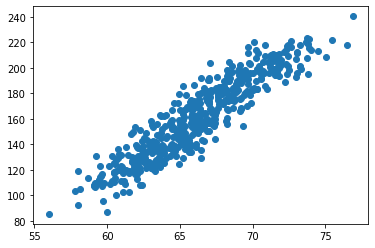

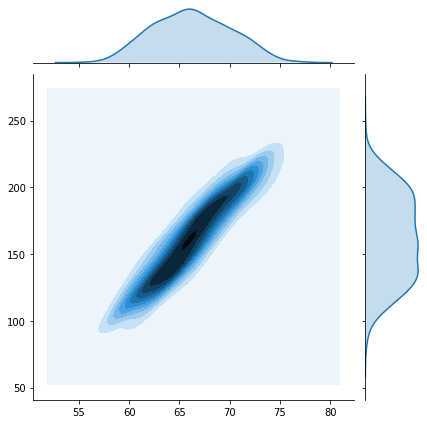

In [30]:
data_samples = df_samples.to_numpy()
plt.scatter(x=data_samples[:,0], y=data_samples[:,1])
sns.jointplot(data_samples[:,0], data_samples[:,1], kind="kde")

## split into train set and test set

In [31]:
df_train = df.sample(frac=0.7)
df_test = df.drop(df_train.index)

In [32]:
df_train

,Gender,Height,Weight
6883,Female,67.070898,160.413715
2172,Male,68.166106,197.179570
6984,Female,58.850294,119.452017
4532,Male,65.034102,163.995593
922,Male,69.812022,188.064984
3504,Male,70.881608,181.988856
8385,Female,64.538995,141.106888
5225,Female,66.537528,162.024508
773,Male,65.965795,186.225431
5989,Female,60.978009,125.104336


In [33]:
df_test

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
14,Male,69.243732,186.434168
15,Male,67.645620,172.186930
16,Male,72.418317,196.028506
23,Male,75.205974,228.761781
25,Male,68.144033,192.343977
26,Male,69.089631,184.435174
28,Male,67.421242,175.213922
